# Practical session on Support Vector Machines (SVM)
( notebook initially created by Judith Abecassis (http://members.cbio.mines-paristech.fr/~jabecassi), Chloé Azencott (http://cazencott.info) and Benoit Playe (http://cbio.ensmp.fr/~bplaye), all 3 from the Center for Computational Biology of MINES ParisTech )

All this notebok is using the simple and very well-known "Iris" classification dataset, which contains 150 examples (each with 4 numeric attributes) equally distributed in 3 classes.


In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
# importer les données
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
# afficher la description de la base de données
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# iris.feature_names[]
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### LINEAR SVM
We first restrict ourselves to two of the three classes: setosa et virginica, and (for visualization purposes) to only 2 of the 4 features/attributes: sepal length and sepal width. We are going to train a linear SVM, and display the obtained separating hyperplane (a straight line, since we for the moment work in 2D input space). 

We will use the [SVC class](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) from the svm module of scikit-learn. **As usual, you should first browse the documentation (here of SVC class) in order to understand well how SVC works, and what are its hyper-parameters.**

In [4]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1000)

# select the data we want: (2 of the 3 classes, and 2 of the 4 features)
X = iris.data[iris.target != 1, :2]
print(X.shape)
y = iris.target[iris.target != 1]
print(y.shape)
clf.fit(X, y)

(100, 2)
(100,)


SVC(C=1000, kernel='linear')

#### Let's plot the separating hyperplane

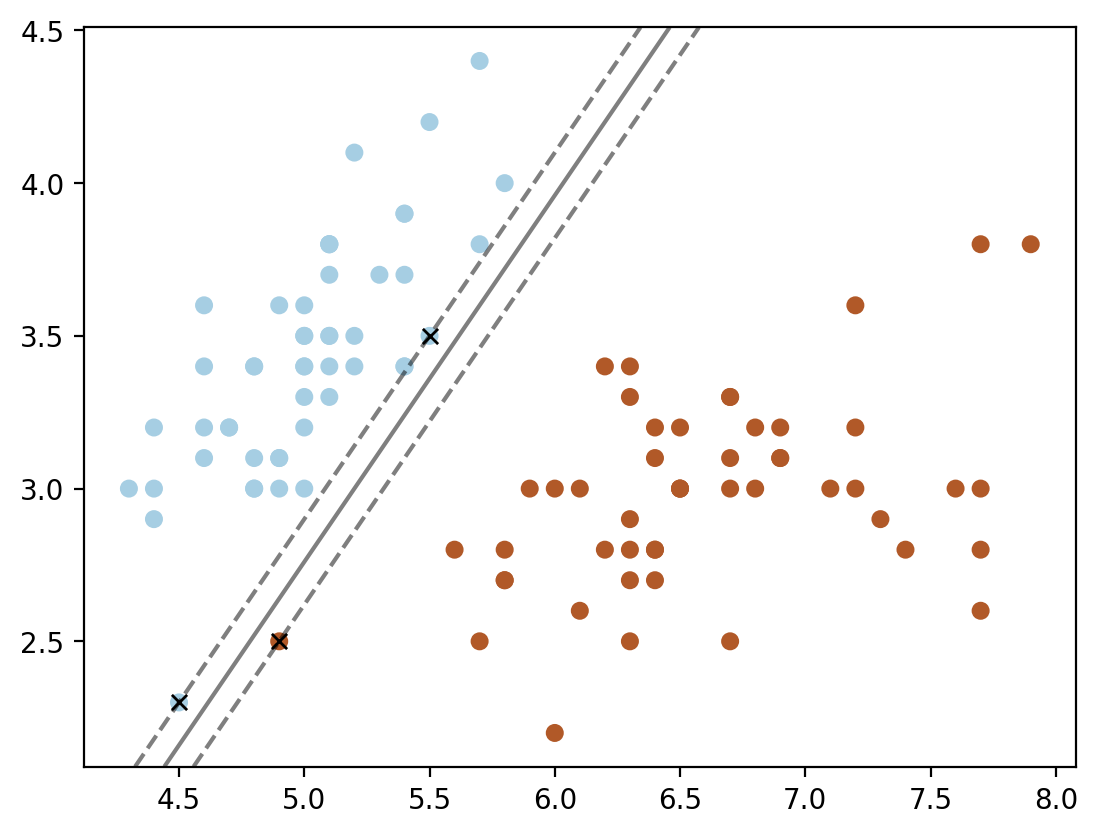

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
# ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
# linewidth=1, facecolors='none')

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=30,
           linewidth=1, marker='x', color='k')

In [6]:
# print the support vectors
print(clf.support_vectors_)

[[5.5 3.5]
 [4.5 2.3]
 [4.9 2.5]]


__Question:__ Where are located the support vectors?

__Answer:__ [[5.5 3.5]
 [4.5 2.3]
 [4.9 2.5]] (On the dotted line, edge of margin)

#### Let us evaluate the performance of the learnt predictor

In [7]:
print(clf.score(X, y))

1.0


__Question:__ What is the performance metric computed by `clf.score`? Please refer to the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.score). What is the meaning if the permormance value is equal to 1.0 ?

__Answer:__ The performance metric computed by clf.score is accuracy. Accuracy is the proportion of correctly predicted samples to the total number of samples. If the performance value is equal to 1.0, it means that the model has made correct predictions for all the test samples, indicating perfect accuracy.

Now, let us consider the *Versicolor* class (instead of Setosa), and still the Virginica class.

In [8]:
clf = svm.SVC(kernel='linear', C=1000)

# select the data we want: (2 of the 3 classes, and 2 of the 4 features)
X = iris.data[iris.target != 0, :2]
print(X.shape)
y = iris.target[iris.target != 0]
print(y.shape)
clf.fit(X, y)

(100, 2)
(100,)


SVC(C=1000, kernel='linear')

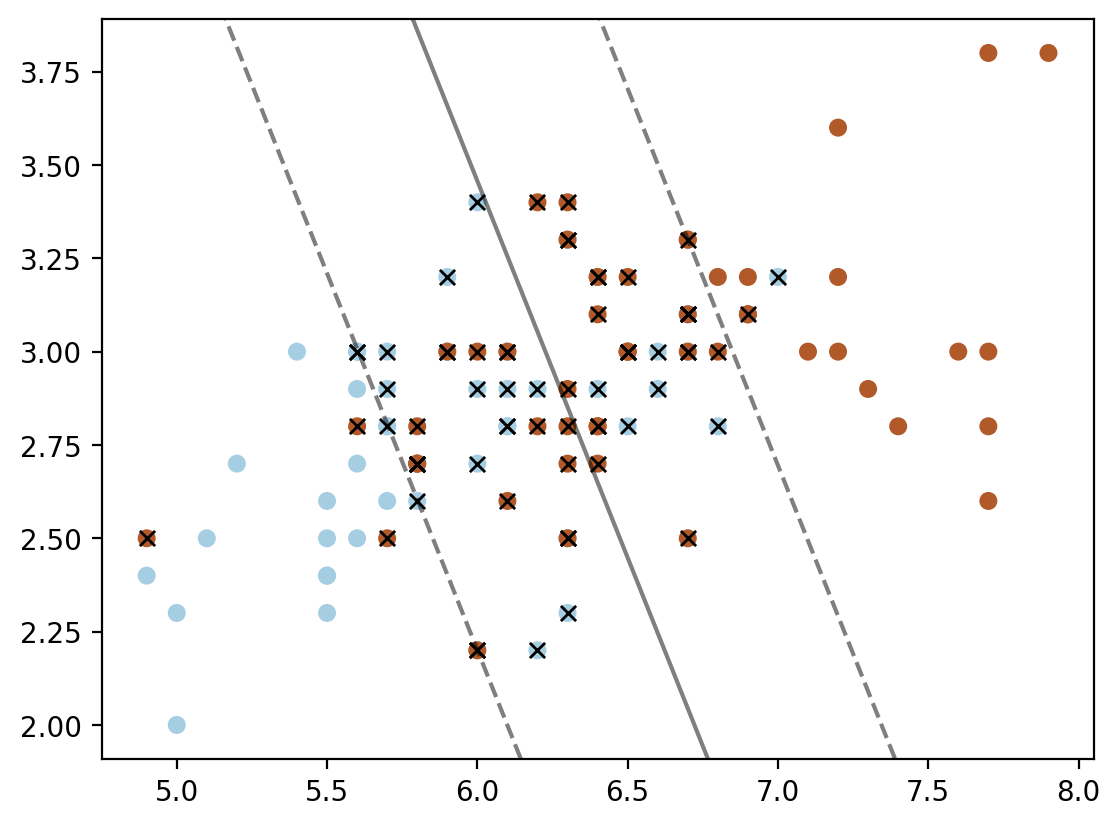

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
# ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
# linewidth=1, facecolors='none')

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=30,
           linewidth=1, marker='x', color='k')

In [10]:
print(clf.support_vectors_)

[[7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [6.5 2.8]
 [6.3 3.3]
 [6.6 2.9]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.8 2.7]
 [6.  2.7]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [6.1 3. ]
 [5.8 2.6]
 [5.7 3. ]
 [5.7 2.9]
 [6.2 2.9]
 [5.7 2.8]
 [6.3 3.3]
 [5.8 2.7]
 [6.3 2.9]
 [6.5 3. ]
 [4.9 2.5]
 [6.7 2.5]
 [6.5 3.2]
 [6.4 2.7]
 [6.8 3. ]
 [5.7 2.5]
 [5.8 2.8]
 [6.4 3.2]
 [6.5 3. ]
 [6.  2.2]
 [5.6 2.8]
 [6.3 2.7]
 [6.7 3.3]
 [6.2 2.8]
 [6.1 3. ]
 [6.4 2.8]
 [6.4 2.8]
 [6.3 2.8]
 [6.1 2.6]
 [6.3 3.4]
 [6.4 3.1]
 [6.  3. ]
 [6.7 3.1]
 [5.8 2.7]
 [6.7 3. ]
 [6.3 2.5]
 [6.5 3. ]
 [6.2 3.4]
 [5.9 3. ]]


__Question:__ Where are located the support vectors?

__Answer:__ Inside the margin, close to the decision boundary.

Now, let us check the performance of the obtained linear SVM on this problem

In [11]:
print(clf.score(X, y))

0.73


The performance is not so good: only ~0.7. We should therefore try to use a NON-LINEAR kernel, in order to obtain a more complex separating boundary that could be better adapted to the data.

### SVM with NON-LINEAR kernel

We will use a Gaussian kernel (named 'rbf' in Scikit-Learn) SVC class, but should try different values for the gamma parameter. As seen during the lecture, the Gaussian kernel formula is: 
$k(x, x') = \frac{1}{\sqrt{2 \pi}} \exp\frac{-||x - x'||^2}{2 \sigma^2}$. 

__Question:__ What does the gamma parameter of Gaussian SVC (i.e. with 'rbf' kernel) correspond to (in equation above, and functionnally)?

__Answer:__

In [12]:
# Values to be tested for gamma
gamma_range = np.linspace(0.1, 50, 20)

for param in gamma_range:
    clf = svm.SVC(kernel='rbf', C=0.01, gamma=param)
    clf.fit(X, y)
    print("gamma: %.2f" % param, "score: %.2f" % clf.score(X, y))

gamma: 0.10 score: 0.68
gamma: 2.73 score: 0.73
gamma: 5.35 score: 0.69
gamma: 7.98 score: 0.70
gamma: 10.61 score: 0.71
gamma: 13.23 score: 0.76
gamma: 15.86 score: 0.76
gamma: 18.48 score: 0.76
gamma: 21.11 score: 0.76
gamma: 23.74 score: 0.78
gamma: 26.36 score: 0.78
gamma: 28.99 score: 0.78
gamma: 31.62 score: 0.78
gamma: 34.24 score: 0.79
gamma: 36.87 score: 0.80
gamma: 39.49 score: 0.80
gamma: 42.12 score: 0.80
gamma: 44.75 score: 0.80
gamma: 47.37 score: 0.80
gamma: 50.00 score: 0.80


__Question:__ Now display the separating boundary for the last of these classifiers, which has a score of ~0.8 (therefore a much better model than the linea SVM model).

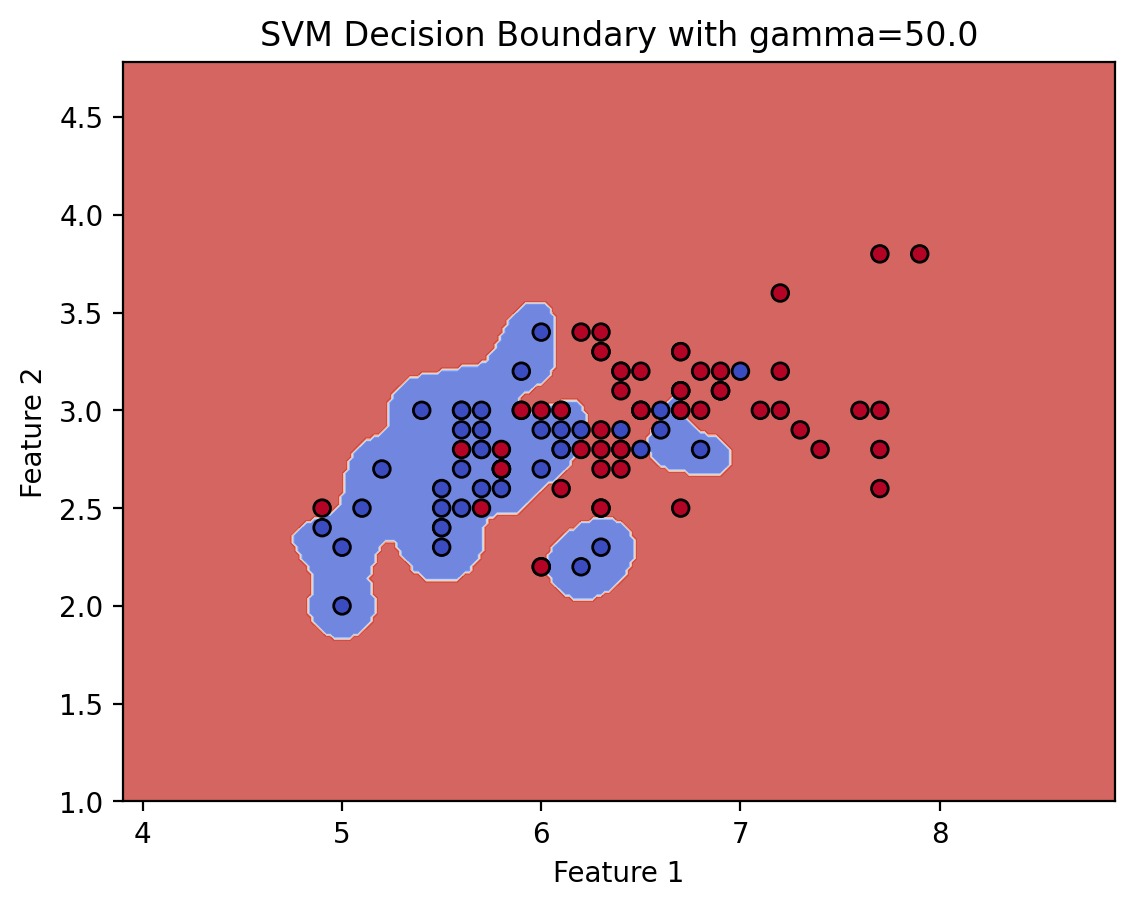

In [13]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with gamma={}'.format(clf.gamma))
plt.show()

In [14]:
print(clf.support_vectors_)

[[7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]
 [6.1 3. ]
 [5.8 2.6]
 [5.  2.3]
 [5.6 2.7]
 [5.7 3. ]
 [5.7 2.9]
 [6.2 2.9]
 [5.1 2.5]
 [5.7 2.8]
 [6.3 3.3]
 [5.8 2.7]
 [7.1 3. ]
 [6.3 2.9]
 [6.5 3. ]
 [7.6 3. ]
 [4.9 2.5]
 [7.3 2.9]
 [6.7 2.5]
 [7.2 3.6]
 [6.5 3.2]
 [6.4 2.7]
 [6.8 3. ]
 [5.7 2.5]
 [5.8 2.8]
 [6.4 3.2]
 [6.5 3. ]
 [7.7 3.8]
 [7.7 2.6]
 [6.  2.2]
 [6.9 3.2]
 [5.6 2.8]
 [7.7 2.8]
 [6.3 2.7]
 [6.7 3.3]
 [7.2 3.2]
 [6.2 2.8]
 [6.1 3. ]
 [6.4 2.8]
 [7.2 3. ]
 [7.4 2.8]
 [7.9 3.8]
 [6.4 2.8]
 [6.3 2.8]
 [6.1 2.6]
 [7.7 3. ]
 [6.3 3.4]
 [6.4 3.1]
 [6.  3. ]
 [6.9 3.1]
 [6.7 3.1]

__Question:__ Which are the support vectors? Do you think the model shall generalize well (and why)?

__Answer:__ **The support vectors are those lie closest to the decision boundary. This is not going to generalize well because the blue area is too small, and the noise example like the red ones in the lower left corner make the SVM over-fitted.**

In order to check if the model __generalizes__ well, we need to apply it on new data examples that have NOT been used for training the classifier. 

To this end, we will separate the data in two: a __training set__ and a __test set__. We will train our SVMs on only the training set, and measure the performance on only the test set. The test set, because it was not used during training, plays the role of future new data. For the splitting, we shall use the `train_test_split` function of scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=56)

acc_train, acc_test = list(), list()
for param in np.linspace(0.1, 50, 20):
    clf = svm.SVC(kernel='rbf', C=0.01, gamma=param)
    clf.fit(X_train, y_train)
    acc_train.append(clf.score(X_train, y_train))
    acc_test.append(clf.score(X_test, y_test))

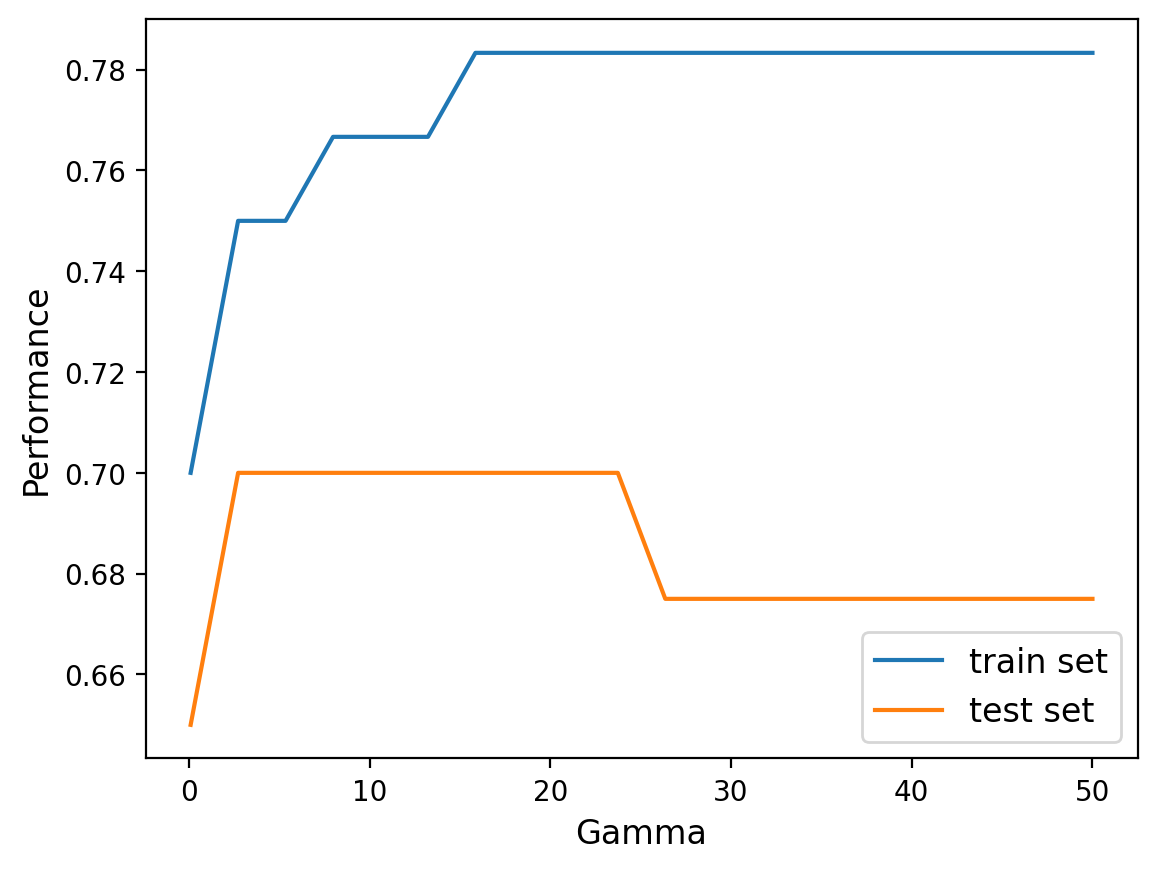

In [16]:
# Plot the traing AND test scores, for each value of gamma hyper-parameter
plt.plot(np.linspace(0.1, 50, 20), acc_train, label='train set')
plt.plot(np.linspace(0.1, 50, 20), acc_test, label='test set')

plt.xlabel("Gamma", fontsize=12)
plt.ylabel("Performance", fontsize=12)

plt.legend(loc='best', fontsize=12)

__Question:__ Do you observe OVER-FITTING? If yes, WHERE? 

__Answer:__ **Yes there is over-fitting. When $gamma > 25$, the performance on train set is significantly larger than that in test set and there is a performance decline in the test set.**

Given the above graphic, we are tempted to choose a value of 10 or 20 for gamma. But BE CAREFULL! If we select the hyper-parameter value which works best on TEST set, it implies that we will have used information from the test set during training, so the performance estimation on test set might be over-estimated...

In order to avoid this, it is necessary to choose the best gamma value rather by __cross-validation__ applied to the TRAINING set. For this, we shall use the [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) class from the model_selection module of scikit-learn.

In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameters and values to be tested
parameters = {'kernel': ('linear', 'rbf'),
              'C': [0.1, 1, 10]}

# Initialize a SVM classifier
svc = svm.SVC()

# Initialize the cross-validation
clf = GridSearchCV(svc, parameters)

# Now, run cross-validation on the TRAINING set
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ('linear', 'rbf')})

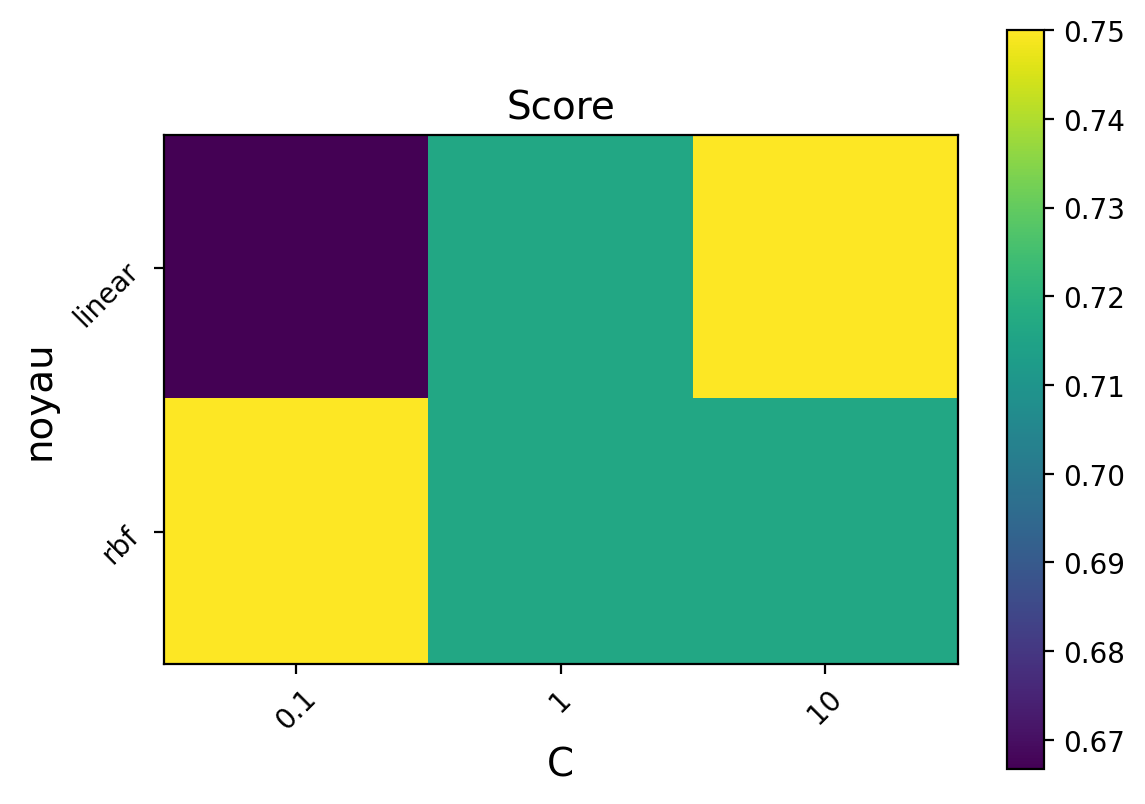

In [18]:
plt.imshow(clf.cv_results_['mean_test_score'].reshape(len(parameters['kernel']),
                                                      len(parameters['C'])), interpolation='none')

plt.xlabel('C', fontsize=14)
plt.ylabel('noyau', fontsize=14)
plt.title("Score", fontsize=14)

plt.xticks(np.arange(len(parameters['C'])), parameters['C'], rotation=45)
plt.yticks(np.arange(len(parameters['kernel'])),
           parameters['kernel'], rotation=45)

plt.colorbar()

__Question:__ What is the role of the hyper-parameter C? What do you observ when C is large? 

__Answer:__ **The hyper-parameter C in an SVM (Support Vector Machine) controls the trade-off between achieving a low training error and a low testing error, which is equivalent to controlling the trade-off between a smooth decision boundary and classifying the training points correctly. With larger C, When C is large, the model will try to classify every training example correctly, which can lead to overfitting. The decision boundary becomes more complex and may capture noise in the training data, potentially reducing the model's ability to generalize to unseen data.**


### Wrap-up: now, write below the codes for finding best SVM hyper-parameters, when using ALL 4 features/attributes:

__Question:__ Train, with CROSS-VALIDATION, a classification SVM to separate classes on the 2 different problems setosa_vs_virginica, then versicolor_vs_virginica. 

What performances obtain your optimal SVMs on the TEST set?

##### 1) Setosa vs virginica

In [7]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

iris = datasets.load_iris()
X = iris.data
y = iris.target

# 只选择 setosa 和 virginica 类别
mask = (y == 0) | (y == 2)
X_setosa_virginica = X[mask]
y_setosa_virginica = y[mask]

# 分割数据集为训练集和测试集
X_train_sv, X_test_sv, y_train_sv, y_test_sv = train_test_split(
    X_setosa_virginica, y_setosa_virginica, test_size=0.3, random_state=42)

# 定义参数网格
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# 使用 GridSearchCV 进行超参数搜索
grid_sv = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

# 训练模型
grid_sv.fit(X_train_sv, y_train_sv)

# 输出最佳参数
print("Best parameters for setosa vs virginica:", grid_sv.best_params_)

# 在测试集上评估性能
y_pred_sv = grid_sv.predict(X_test_sv)

print("Classification report for setosa vs virginica:\n",
      classification_report(y_test_sv, y_pred_sv))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

On test test, it gains 100% accuracy.

##### 2) Versicolour et Virginica

In [8]:
# Answer
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

iris = datasets.load_iris()
X = iris.data
y = iris.target

mask = (y == 1) | (y == 2)
X_versicolor_virginica = X[mask]
y_versicolor_virginica = y[mask]
X_train_vv, X_test_vv, y_train_vv, y_test_vv = train_test_split(
    X_versicolor_virginica, y_versicolor_virginica, test_size=0.3, random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid_vv = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid_vv.fit(X_train_vv, y_train_vv)
print("Best parameters for versicolor vs virginica:", grid_vv.best_params_)
y_pred_vv = grid_vv.predict(X_test_vv)
print("Classification report for versicolor vs virginica:\n",
      classification_report(y_test_vv, y_pred_vv))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

It gains 80% accuracy on the test set.

__Question: Look into SVC documentation, and explain how it handles MULTI-CLASS problems. *How many different SVMs does SVC learn and combine if there is a total of K classes*?__ 

__Answer:__ In scikit-learn, SVC uses a one-vs-one (OvO) strategy to handle multi-class classification problems. This means that for each pair of classes, a binary SVM classifier is trained. If there are a total of $K$ classes, SVC will learn and combine $\frac{K(K-1)}{2}$ different SVM classifiers. Each classifier distinguishes between two classes, and the final multi-class classification result is obtained by combining the results of these binary classifiers, typically using a voting mechanism.


### Assignment #1: 1/ Find (using gridSearch) the best possible SVM (with any kernel type among linear, polynomial or Gaussian) for the COMPLETE dataset (all 3 classes). 2/ For the best SVM model found, compute and display the CONFUSION MATRIX + compute and plot the PRECISION-RECALL CURVES FOR EACH CLASS

NB: for the second question, SEARCH BY YOURSELF INTO THE SciKit-Learn documentation in order to find the corresponding pre-programmed functions.

Best parameters found:  {'C': 1, 'gamma': 'scale', 'kernel': 'poly'}
Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


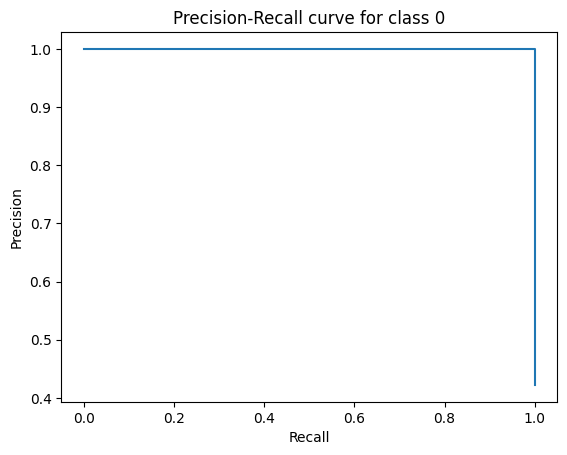

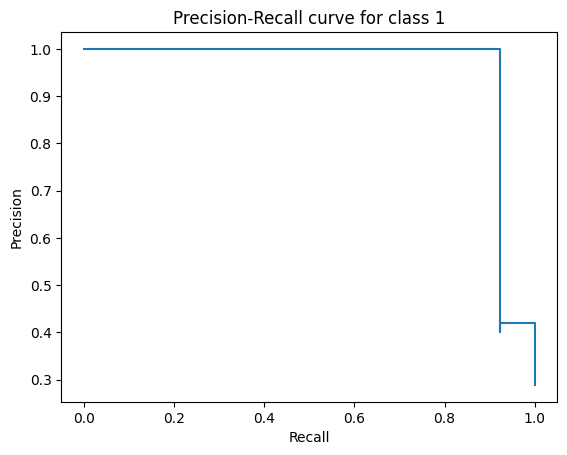

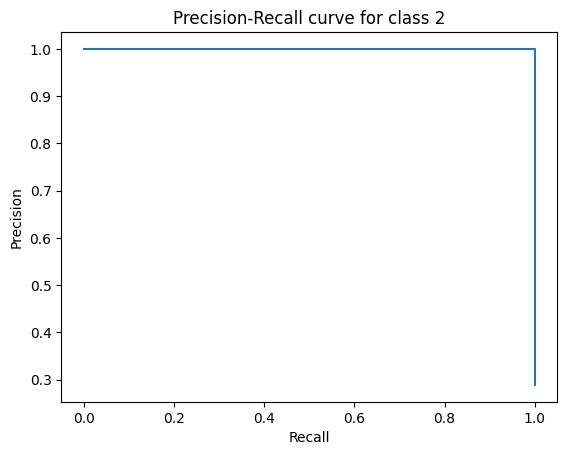

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_recall_curve, PrecisionRecallDisplay

iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
for i in range(3):
    precision, recall, _ = precision_recall_curve(
        y_test == i, best_model.decision_function(X_test)[:, i])
    display = PrecisionRecallDisplay(precision=precision, recall=recall)
    display.plot()
    plt.title(f'Precision-Recall curve for class {i}')
    plt.show()

# Final assignment on SVM 

**Now, use SVM to learn digit recognition on the [*Digits dataset*](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html#sphx-glr-auto-examples-datasets-plot-digits-last-image-py)" (the same that was used at the end of the MLP practical session)**

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        82
           1       1.00      1.00      1.00        89
           2       1.00      1.00      1.00        83
           3       0.99      0.97      0.98        93
           4       1.00      1.00      1.00        93
           5       0.98      0.98      0.98        99
           6       1.00      0.98      0.99        98
           7       0.97      0.99      0.98        87
           8       0.98      1.00      0.99        83
           9       0.97      0.96      0.96        92

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899

Accuracy score: 0.9866518353726362


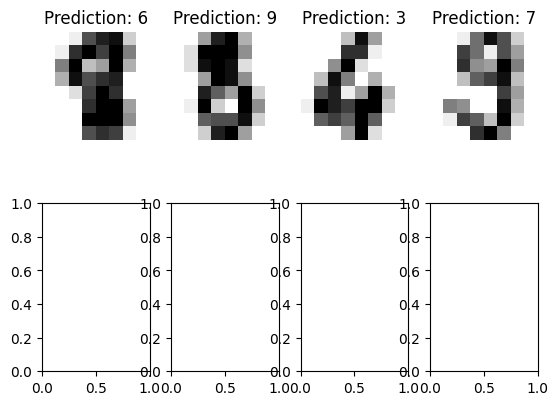

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score

digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.5, random_state=42)
clf = svm.SVC(gamma=0.001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Classification report:\n", classification_report(y_test, y_pred))
print("Accuracy score:", accuracy_score(y_test, y_pred))
_, axes = plt.subplots(2, 4)
images_and_predictions = list(zip(digits.images[len(X_train):], y_pred))
for ax, (image, prediction) in zip(axes[0, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')
plt.show()